## 4.Support Vector Regression


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

In [3]:
data=pd.read_csv('AirPassengers.csv')

In [4]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
print(data.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [7]:
print(data.tail())

       Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432


In [8]:
#converting a month to date_time format
data['Month'] = pd.to_datetime(data['Month'])  # Parse dates
data.set_index('Month', inplace=True)

In [9]:
data['TimeIndex']=np.arange(len(data))

In [10]:
# Instead of using the lists 'x' and 'y', access the data directly from the DataFrame:
X = data[['TimeIndex']]  # Use double brackets to select as a DataFrame
y = data['#Passengers']

# Now you can split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.svm import SVR

In [12]:
# SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1)
svr.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [13]:

# Predictions
y_pred_svr = svr.predict(X_test)

In [14]:
# Metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

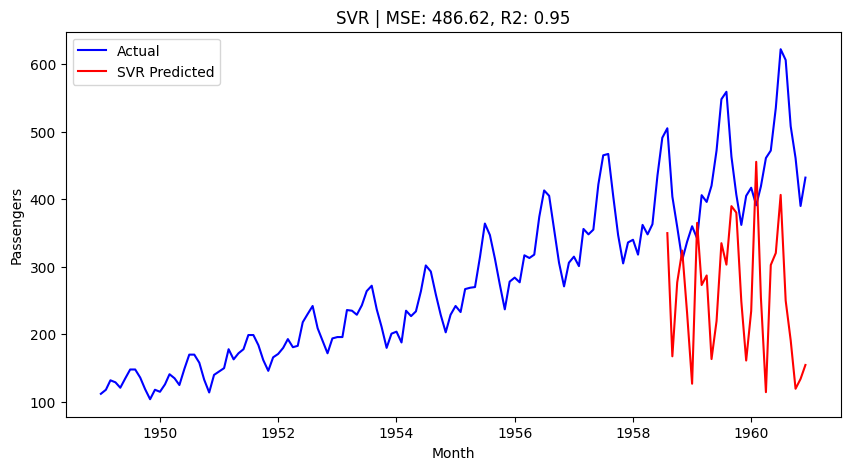

In [15]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(data.index, y, label='Actual', color='blue')
plt.plot(data.index[-len(y_test):], y_pred_svr, label='SVR Predicted', color='red')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title(f'SVR | MSE: {mse_svr:.2f}, R2: {r2_svr:.2f}')
plt.show()